<a href="https://colab.research.google.com/github/ramonis567/SARS-CoV-2/blob/master/Estudo_SARS_CoV_2_Cara%C3%AD_MG_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ESTUDO - SARS-CoV-2 - Caraí - Minas Gerais**

#### Estudo estátistico da Evolução do Novo Coronavirus (SARS-CoV-2) na cidade de Caraí em Minas Gerais

# **Estudo Geral do Município**

### **Bibliotecas Python utilizadas**
O código a seguir importa as bibliotecas **Matplotlib, e Pandas** para o código. Essas bibliotecas escritas na linguagem de programação **Python** auxiliam na **análise, exploração e visualização de dados**, com elas, será possível aplicar técnicas **matemáticas e estatísticas** ao nosso estudo.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

O código a seguir trata de questões **estilísticas** da exibição dos dados. Aumentando o **tamanho padrão de exibição e cor** dos gráficos.

In [2]:
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = (12,8)

###**Definição dos Dados do Município**

O trecho de código a seguir, importa os dados extraídos dos **Boletins Epidemiológicos** disponibilizados pela **Secretaria de Saúde do Munícipio**, e é feita a atribuição desses dados à variável **df (dataframe)**. 

Para não ser necessário uso de extensos arranjos de dados, hospedei os dados na plataforma de hospedagem e versionamento de códigos **Github** em modo **Open Source**. 

Como a Secretaria de Saúde e a Prefeitura **não disponibilizam** os dados em formato **.csv**, se torna necessário a **atualização constante dos dados** após cada **boletim epidemiológico**.

O arquivo .csv referido está disponível [AQUI](https://github.com/ramonis567/SARS-CoV-2/blob/master/DadosSARSCoV2.csv)

In [3]:
url = "https://raw.githubusercontent.com/ramonis567/SARS-CoV-2/master/DadosSARSCoV2.csv"
df = pd.read_csv(url)

# **Análise do Município Geral**

##**Gráficos**

O seguinte código geral um gráfico para **visualização do numero total** de casos ao longo dos dias epidemiológicos (Dia em que foi confirmado o primeiro caso).


Text(0, 0.5, 'Total de Casos')

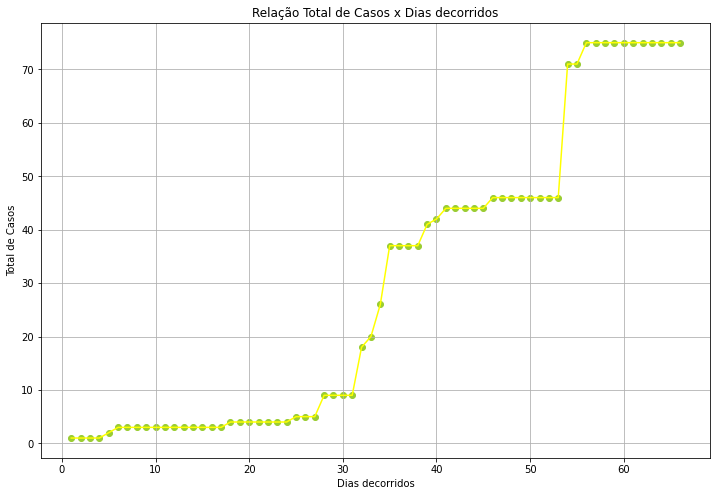

In [4]:
plt.plot(df.diasCorridos, df.totalCasos, color='yellow')
plt.scatter(df.diasCorridos, df.totalCasos, color='yellowgreen')
plt.grid(True)
plt.title("Relação Total de Casos x Dias decorridos")
plt.xlabel("Dias decorridos")
plt.ylabel("Total de Casos")

O seguinte gráfico apresenta uma comparação entre dias corridos desde o primeiro caso confirmado no munícipio e o numero total de casos (em amarelo), número total de óbitos (em vermelho) e número total de recuperados (em verde).

Text(0, 0.5, 'Total de Casos')

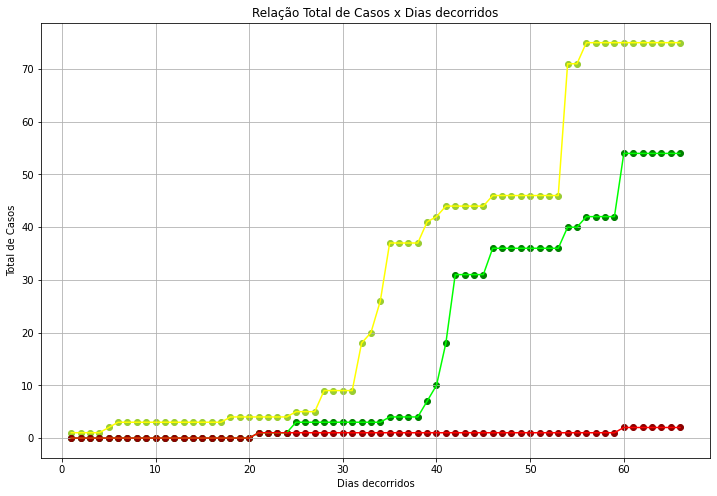

In [5]:
plt.plot(df.diasCorridos, df.totalCasos, color = 'yellow')
plt.plot(df.diasCorridos, df.totalRecuperados, color = 'lime')
plt.plot(df.diasCorridos, df.totalObitos, color = 'red')
plt.scatter(df.diasCorridos, df.totalCasos, color = 'yellowgreen')
plt.scatter(df.diasCorridos, df.totalRecuperados, color = 'green')
plt.scatter(df.diasCorridos, df.totalObitos, color = 'darkred')
plt.grid(True)
plt.title("Relação Total de Casos x Dias decorridos")
plt.xlabel("Dias decorridos")
plt.ylabel("Total de Casos")

# **Estudo da Sede**

##**Definição dos Dados da Sede**

O seguinte código geral um gráfico para visualização do numero total de casos ao longo dos dias para a sede do município. Sendo o primeiro dia epidemiológico o dia da primeira confirmação por SARS-CoV-2 confimada na sede do município.

### **Gráficos**

Text(0, 0.5, 'Total de Casos')

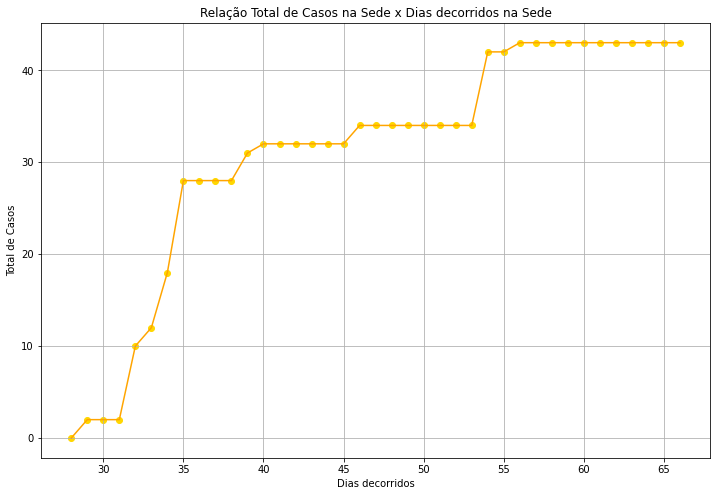

In [6]:
plt.plot(df.diasCorridos[27:], df.totalSede[27:], color='orange')
plt.scatter(df.diasCorridos[27:], df.totalSede[27:], color='gold')
plt.grid(True)
plt.title("Relação Total de Casos na Sede x Dias decorridos na Sede")
plt.xlabel("Dias decorridos")
plt.ylabel("Total de Casos")

# **Taxa de Letalidade**

## **Evolução da Taxa de Letalidade ao Longo dos Dias**

Text(0, 0.5, 'Taxa de Letalidade (em %)')

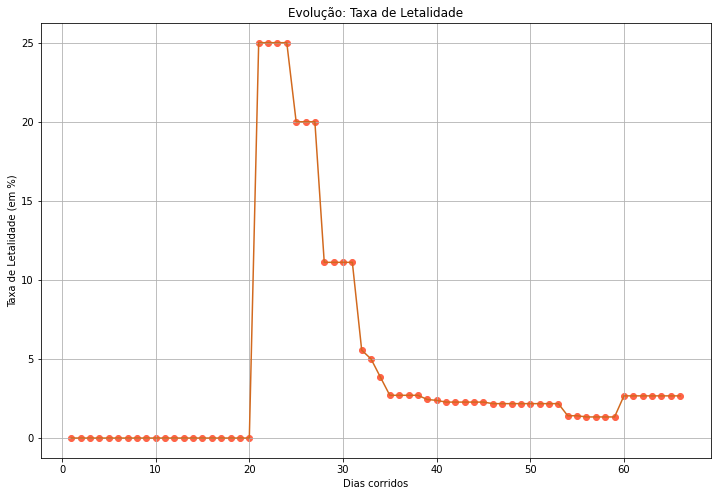

In [7]:
taxaLetalidade = df.totalObitos/df.totalCasos
taxaLetalidade = taxaLetalidade * 100
plt.plot(df.diasCorridos, taxaLetalidade, color = 'chocolate')
plt.scatter(df.diasCorridos, taxaLetalidade, color = 'tomato')
plt.grid(True)
plt.title('Evolução: Taxa de Letalidade')
plt.xlabel('Dias corridos')
plt.ylabel('Taxa de Letalidade (em %)')

Com o gráfico acima, é possível anotar a evolução da taxa de letalidade por complicações da doença do Novo CoronaVirus, a COVID-19. Até o presente momento o pico de letalidade foi no 21 dia de contagem, no dia 25 de Junho, quando o número de casos confirmados era apenas 4, e foi informada a primeira morte. Como não houveram novas mortes e mais casos surgiram, a taxa de letalidade reduziu consideravelmente. 

**Nota:**
*A taxa de letalidade depende diretamente da quantidade de casos confirmados do vírus, que por sua vez, dependa da quantidade de testes aplicados.*

#**NOVOS CASOS POR DIA**

No gráfico de barras a seguir, visualiza-se a quantidade de confirmações por dia epidemiológico, nota-se também o crescimento após o 31º dia epidemiológico.

Text(0, 0.5, 'Novos casos confimados')

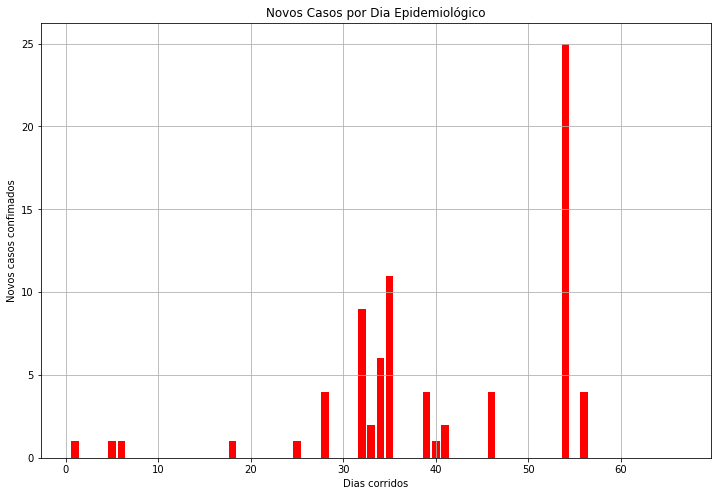

In [8]:
plt.bar(df.diasCorridos, df.novosCasos, color = 'r')
plt.grid(True)
plt.title('Novos Casos por Dia Epidemiológico')
plt.xlabel('Dias corridos')
plt.ylabel('Novos casos confimados')

####**Os dados apresentados podem ser usados para visualização de tendência de crescimento ou queda das infecções por SARS-CoV-2 no município, aplicando técnicas de regressão linear, também é possível prever uma quantidade aproximada de casos a serem confimados por dia.**

####Para previsão, deve se pegar o logaritmo dos número de novos casos por dia, aplicar o método de quadrados mínimos lineares para descobrir os coeficientes alpha e beta da regressão linear (y = a + b*x), e aplicar o exponencial desses números a fórmula de crescimento exponencial ( x(t) = a * (b^t) ). Fazendo um ajuste de curva, obtém-se uma previsão estatística do número de casos a serem confirmados futuramente.

####As bibliotecas python de computação numérica (math, seaborn, statsmodel, e numPy) podem ser usadas para esse fim.